In [1]:
import pandas as pd

In [2]:
# load pre-processed dataset
df = pd.read_csv('../../datasets/pre_processed_dataset.csv')
df.sample(3)

,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Item Name_7 colour pepper,Item Name_agaricus bisporus,Item Name_aihao,Item Name_amaranth,Item Name_apricot bao mushroom,Item Name_basil,Item Name_bell pepper,Item Name_big broccoli,...,Item Name_yuxingcao,Item Name_zhijiang red bolt,Item Name_zhimaxiancai,Item Name_zhuyecai,Category Name_aquatic,Category Name_cabbage,Category Name_capsicum,Category Name_flower,Category Name_mushroom,Category Name_solanum
3812,0.191000,29.6,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
976,0.394364,3.4,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
10722,1.000000,4.5,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [3]:
from sklearn.model_selection import train_test_split
import tensorflow as tf

/Users/rumethsandinu/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [4]:
# define dependent and non dependent variables
y = df['Quantity Sold (kilo)']
x = df.drop(columns=['Quantity Sold (kilo)'], axis=1)

# split the dataset 0.8, 0.2, 0.1
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.2, random_state=42)
x_eval, x_test, y_eval, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

# convert to tensor arrays
x_train_tensor = tf.constant(x_train, dtype=tf.float32)
y_train_tensor = tf.constant(y_train, dtype=tf.float32)
x_eval_tensor = tf.constant(x_eval, dtype=tf.float32)
y_eval_tensor = tf.constant(y_eval, dtype=tf.float32)

x_train_tensor.shape, x_eval_tensor.shape, x_test.shape

2024-01-22 19:49:55.382988: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2024-01-22 19:49:55.383006: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-01-22 19:49:55.383011: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-01-22 19:49:55.383039: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-01-22 19:49:55.383051: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


(TensorShape([9460, 150]), TensorShape([1183, 150]), (1183, 150))

In [5]:
# save testing dataset
df_test = pd.concat([y_test.reset_index(drop=True), x_test.reset_index(drop=True)], axis=1)
df_test.to_csv('../../datasets/testing_dataset.csv')
df_test.sample(3)

,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Item Name_7 colour pepper,Item Name_agaricus bisporus,Item Name_aihao,Item Name_amaranth,Item Name_apricot bao mushroom,Item Name_basil,Item Name_bell pepper,Item Name_big broccoli,...,Item Name_yuxingcao,Item Name_zhijiang red bolt,Item Name_zhimaxiancai,Item Name_zhuyecai,Category Name_aquatic,Category Name_cabbage,Category Name_capsicum,Category Name_flower,Category Name_mushroom,Category Name_solanum
884,0.610079,4.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1087,0.462000,4.8,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
284,1.000000,1.5,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [6]:
# convert to tensor arrays
x_test_tensor = tf.constant(x_test, dtype=tf.float32)
y_test_tensor = tf.constant(y_test, dtype=tf.float32)

In [7]:
# model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(150, activation='relu', input_shape=(x_train_tensor.shape[1],)))
model.add(tf.keras.layers.Reshape((1, 150))) 
model.add(tf.keras.layers.LSTM(128, return_sequences=True))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.LSTM(16))
model.add(tf.keras.layers.Dense(4, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='linear'))

# compile model
model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=1e-5), loss='mae', metrics=['mae'])

epoch_number = 60

# train model and get history
history = model.fit(x_train_tensor, y_train_tensor, epochs=epoch_number, validation_data=(x_eval_tensor, y_eval_tensor))

Epoch 1/60


2024-01-22 19:49:59.234844: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


296/296 [==============================] - 7s 18ms/step - loss: 0.6136 - mae: 0.6136 - val_loss: 0.5885 - val_mae: 0.5885
Epoch 2/60
296/296 [==============================] - 5s 16ms/step - loss: 0.5791 - mae: 0.5791 - val_loss: 0.5341 - val_mae: 0.5341
Epoch 3/60
296/296 [==============================] - 5s 15ms/step - loss: 0.5116 - mae: 0.5116 - val_loss: 0.4600 - val_mae: 0.4600
Epoch 4/60
296/296 [==============================] - 5s 15ms/step - loss: 0.4501 - mae: 0.4501 - val_loss: 0.4104 - val_mae: 0.4104
Epoch 5/60
296/296 [==============================] - 5s 17ms/step - loss: 0.4076 - mae: 0.4076 - val_loss: 0.3737 - val_mae: 0.3737
Epoch 6/60
296/296 [==============================] - 5s 16ms/step - loss: 0.3738 - mae: 0.3738 - val_loss: 0.3437 - val_mae: 0.3437
Epoch 7/60
296/296 [==============================] - 5s 16ms/step - loss: 0.3454 - mae: 0.3454 - val_loss: 0.3185 - val_mae: 0.3185
Epoch 8/60
296/296 [==============================] - 5s 18ms/step - loss: 0.321

In [8]:
import matplotlib.pyplot as plt

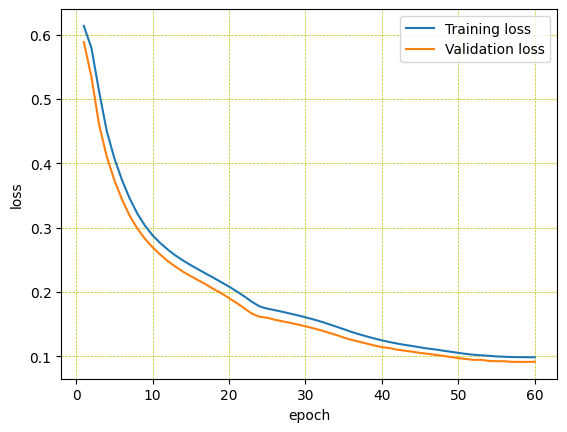

In [9]:
# plot loss with respect to epoch number
x_range = range(1, epoch_number + 1)
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(x_range, loss, label='Training loss')
plt.plot(x_range, val_loss, label='Validation loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.grid(True, linewidth = 0.5, color = 'y', linestyle = '--')

In [10]:
# final_model
final_model = tf.keras.Sequential()
final_model.add(tf.keras.layers.Dense(150, activation='relu', input_shape=(x_train_tensor.shape[1],)))
final_model.add(tf.keras.layers.Reshape((1, 150))) 
final_model.add(tf.keras.layers.LSTM(128, return_sequences=True))
final_model.add(tf.keras.layers.Dense(64, activation='relu'))
final_model.add(tf.keras.layers.Dense(32, activation='relu'))
final_model.add(tf.keras.layers.LSTM(16))
final_model.add(tf.keras.layers.Dense(4, activation='relu'))
final_model.add(tf.keras.layers.Dense(1, activation='linear'))

# compile model
final_model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=1e-5), loss='mae', metrics=['mae'])

epoch_number = 50

# train model and get history
history = final_model.fit(x_train_tensor, y_train_tensor, epochs=epoch_number, validation_data=(x_eval_tensor, y_eval_tensor))

Epoch 1/50
296/296 [==============================] - 7s 18ms/step - loss: 0.5372 - mae: 0.5372 - val_loss: 0.4615 - val_mae: 0.4615
Epoch 2/50
296/296 [==============================] - 5s 17ms/step - loss: 0.4451 - mae: 0.4451 - val_loss: 0.4003 - val_mae: 0.4003
Epoch 3/50
296/296 [==============================] - 5s 15ms/step - loss: 0.3919 - mae: 0.3919 - val_loss: 0.3525 - val_mae: 0.3525
Epoch 4/50
296/296 [==============================] - 4s 15ms/step - loss: 0.3470 - mae: 0.3470 - val_loss: 0.3151 - val_mae: 0.3151
Epoch 5/50
296/296 [==============================] - 5s 15ms/step - loss: 0.3133 - mae: 0.3133 - val_loss: 0.2867 - val_mae: 0.2867
Epoch 6/50
296/296 [==============================] - 4s 15ms/step - loss: 0.2883 - mae: 0.2883 - val_loss: 0.2655 - val_mae: 0.2655
Epoch 7/50
296/296 [==============================] - 4s 15ms/step - loss: 0.2693 - mae: 0.2693 - val_loss: 0.2484 - val_mae: 0.2484
Epoch 8/50
296/296 [==============================] - 4s 15ms/step - 

In [11]:
final_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 150)               22650     
                                                                 
 reshape_1 (Reshape)         (None, 1, 150)            0         
                                                                 
 lstm_2 (LSTM)               (None, 1, 128)            142848    
                                                                 
 dense_6 (Dense)             (None, 1, 64)             8256      
                                                                 
 dense_7 (Dense)             (None, 1, 32)             2080      
                                                                 
 lstm_3 (LSTM)               (None, 16)                3136      
                                                                 
 dense_8 (Dense)             (None, 4)                

In [12]:
# view loss for testing values
final_model.evaluate(x_test_tensor, y_test_tensor)

37/37 [==============================] - 0s 8ms/step - loss: 0.0971 - mae: 0.0971


[0.0970710813999176, 0.0970710813999176]

In [13]:
# predict sample value set
y_predictions = final_model.predict(x_test_tensor)
y_predictions[:10]

37/37 [==============================] - 1s 9ms/step


array([[0.21550518],
       [0.26958367],
       [0.40937173],
       [0.37265182],
       [0.37259167],
       [1.0143572 ],
       [0.29347795],
       [0.94906956],
       [0.13966233],
       [0.3080641 ]], dtype=float32)

In [14]:
# view actual values
y_test_tensor[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([0.2404    , 0.2775    , 0.43416667, 0.36781818, 0.259     ,
       1.        , 0.3315294 , 1.        , 0.1       , 0.38275   ],
      dtype=float32)>

In [15]:
# save final model
final_model.save('sales_prediction_model')

INFO:tensorflow:Assets written to: sales_prediction_model/assets


INFO:tensorflow:Assets written to: sales_prediction_model/assets
